In [1]:
import pandas as pd
import numpy as np
import datarobot as dr
from collections import defaultdict
import datetime as dt 

In [21]:
pd.set_option('display.max_columns', 58, 'display.max_rows',200)

In [6]:
dr.Client(config_path='/Users/chandler.mccann/DataRobot/drconfig.yaml')

In [6]:
#df=pd.read_csv('/Users/chandler.mccann/Downloads/all_training_water_points_revised_6397492177bd1310832517a (1).csv')

In [145]:
dataset= dr.Dataset.get('6397492077bd131083251759') #all_training_water_points_revised.csv
df = dr.Dataset.get_as_dataframe(dataset)
df

,wpdx_id,status_id,clean_country_id,clean_adm1,clean_adm2,water_tech_clean,water_source_clean,water_tech_category,water_source_category,management_clean,report_date,unified_install_year,unified_installer,age_in_years,distance_to_primary,distance_to_secondary,distance_to_tertiary,distance_to_city,distance_to_town,is_urban,precipitation_5year,precipitation_10year,landcover_code,acled_index,isobioclimates,bgs_dtw,bgs_prod,bgs_stor,bgs_recharge,water_risk,rwi,assigned_population,local_population,usage_cap,pressure,criticality,population_1km,men_ratio_1km,women_of_reproductive_age_ratio_1km,youth_ratio_1km,elderly_ratio_1km,children_under_five_ratio_1km,population_10km,men_ratio_10km,women_of_reproductive_age_ratio_10km,youth_ratio_10km,elderly_ratio_10km,children_under_five_ratio_10km,population_100km,men_ratio_100km,women_of_reproductive_age_ratio_100km,youth_ratio_100km,elderly_ratio_100km,children_under_five_ratio_100km,orig_status_id,years_since_report,fold
0,6FQ9482M+PMM,Yes,NGA,Abia,Aba North,Mechanized Pump,Borehole,Mechanized Pump,Well,NaN,2016-02-22,2016.0,NaN,0.142371,4137.227549,210.718247,429.924591,3557.143171,11326.817030,True,2770.521084,2868.369500,190,108.0,27.0,7.0,5.0,25000.0,224.707962,2.34869,0.839,17082.0,23958.0,1000.0,17.082,0.712998,30888.167969,0.502132,0.287899,0.222935,0.044223,0.114531,1.197378e+06,0.507024,0.277746,0.223678,0.051395,0.114979,23318522.0,0.507644,0.268988,0.220683,0.058466,0.118593,Yes,0.142371,2018-01-01
1,6FQ938VF+46J,Yes,NGA,Abia,Aba North,Mechanized Pump,Borehole,Mechanized Pump,Well,NaN,2014-06-17,2014.0,NaN,0.457230,5720.273976,1057.206474,1052.776305,5085.677853,10012.656893,True,2770.521084,2868.369500,190,108.0,37.0,7.0,5.0,25000.0,224.707962,2.34869,0.839,2477.0,10619.0,1000.0,2.477,0.233261,9490.695312,0.503437,0.284820,0.222519,0.045427,0.116410,1.135966e+06,0.507833,0.278442,0.224242,0.050063,0.114666,23403080.0,0.507744,0.269071,0.220909,0.058494,0.118327,Yes,0.457230,2019-01-01
2,6FQ939HG+JVV,No,NGA,Abia,Aba North,Mechanized Pump,Borehole,Mechanized Pump,Well,Direct Government Operation,2015-05-13,NaN,NaN,NaN,3968.763794,3636.581555,215.521101,3963.403712,16049.400994,True,2776.522756,2870.046139,190,101.0,37.0,0.0,5.0,25000.0,224.208771,2.34869,0.118,8764.0,22502.0,1000.0,8.764,0.389476,29341.490234,0.511027,0.283686,0.228078,0.045259,0.108963,1.204853e+06,0.506610,0.277257,0.223605,0.052566,0.114507,23318522.0,0.507644,0.268988,0.220683,0.058466,0.118593,Yes,0.002738,2020-01-01
3,6FQ938RF+FF7,Yes,NGA,Abia,Aba North,Mechanized Pump,Borehole,Mechanized Pump,Well,NaN,2015-09-14,2015.0,NaN,0.700904,5793.620116,862.672251,855.149841,5102.647106,10081.397795,True,2770.521084,2868.369500,190,108.0,37.0,7.0,5.0,25000.0,224.707962,2.34869,0.839,3150.0,15530.0,1000.0,3.150,0.202833,11599.144531,0.506182,0.284891,0.224758,0.045161,0.113190,1.135966e+06,0.507833,0.278442,0.224242,0.050063,0.114666,23403080.0,0.507744,0.269071,0.220909,0.058494,0.118327,Yes,0.700904,2021-01-01
4,6FQ939VM+2J2,Yes,NGA,Abia,Aba North,Mechanized Pump,Borehole,Mechanized Pump,Well,NaN,2015-07-11,2015.0,NaN,0.522940,2484.450529,2136.400062,699.229911,3123.266918,16772.962883,True,2776.522756,2870.046139,190,109.0,27.0,0.0,5.0,25000.0,224.208771,2.34869,0.118,5222.0,25303.0,1000.0,5.222,0.206379,25474.492188,0.501720,0.283951,0.222544,0.049814,0.113568,1.189670e+06,0.506586,0.277391,0.223617,0.052585,0.114410,23318522.0,0.507644,0.268988,0.220683,0.058466,0.118593,Yes,0.522940,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320322,5GPQGGQQ+8QP,Yes,MWI,Zomba,TA Mwambo,Hand Pump - Afridev,Borehole,Hand Pump,Well,NaN,2021-04-27,2021.0,WaterAid,0.317597,53574.023606,6895.126575,80.321742,24296.672756,24876.592613,False,851.457000,836.248318,11,0.0,46.0,0.0,20.0,10000.0,101.342316,2.11248,-0.013,72.0,404.0,300.0,0.240,0

In [120]:
df['report_year']=pd.to_datetime(df['report_date']).apply(lambda x: x.year) # get year field to compare within folds

In [124]:
#df.groupby(['fold'])['report_year'].value_counts()

In [146]:
df.groupby('fold')['years_since_report'].describe()

,count,mean,std,min,25%,50%,75%,max
fold,,,,,,,,
2018-01-01,64755.0,9.171451,10.436078,-27.896534,2.099975,5.604496,12.790133,115.178272
2019-01-01,64052.0,9.247432,10.507730,-26.182605,2.146519,5.700322,13.002320,115.378139
2020-01-01,64043.0,9.218120,10.466715,-14.998255,2.115033,5.626399,13.002320,117.201585
2021-01-01,64052.0,9.192217,10.410115,-29.621416,2.124616,5.642826,13.002320,114.923647
2022-01-01,63425.0,9.186601,10.384966,-29.988295,2.110926,5.653778,12.829832,114.266549


In [36]:
ug = df.loc[df.clean_country_id=='UGA']
#ug.groupby('fold')['years_since_report'].mean()
#ug.groupby(['fold'])['report_year'].value_counts().sort_index(level='report_year')

#data is not sorted into a holdout. Just evenly split across folds

(91411, 58)


<AxesSubplot: >

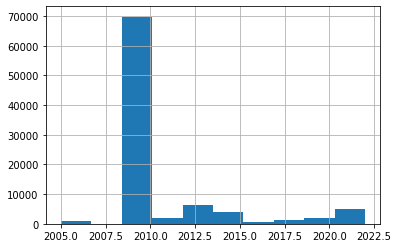

In [75]:
print(ug.shape) #all data for uganda
ug['report_year'].hist()

13712


<AxesSubplot: >

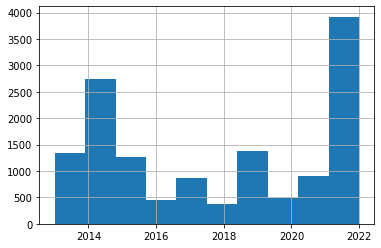

In [67]:

holdout_rows= round(ug.shape[0]*.15)
holdout_fake_date = '1999-01-01'
print(holdout_rows)
holdout = ug.sort_values(by='report_date', ascending=False).head(holdout_rows)
holdout['report_year'].hist() #15% most recent data for holdout

In [48]:
holdout.groupby('fold').size() #fairly equal distribution across folds

fold
2018-01-01    1828
2019-01-01    1802
2020-01-01    1842
2021-01-01    1835
2022-01-01    1834
dtype: int64

In [55]:
ug[~ug.index.isin(holdout.index)].shape[0] + holdout.shape[0] == ug.shape[0]

True

In [68]:
#set 15% holdout on most recent data
#set the value of fold for holdout cells to 1999-01-01
indices = holdout.index
#ug.loc[holdout.index,:]['fold'] = '1999-01-01'
ug.loc[indices,'fold'] = holdout_fake_date
ug.groupby('fold').size()

fold
1999-01-01    13712
2018-01-01    15596
2019-01-01    15570
2020-01-01    15537
2021-01-01    15509
2022-01-01    15487
dtype: int64

In [74]:
print(ug.wpdx_id.nunique()/ug.shape[0] *100, ' percent of waterpoints with only 1 obeservation')



92.36087560578049  percent of waterpoints with only 1 obeservation


In [70]:
ug.to_csv('ug_w_holdout.csv', index=False)

In [88]:
###### all ####
df.groupby('fold')['years_since_report'].describe()

,count,mean,std,min,25%,50%,75%,max
fold,,,,,,,,
2018-01-01,64755.0,9.171451,10.436078,-27.896534,2.099975,5.604496,12.790133,115.178272
2019-01-01,64052.0,9.247432,10.507730,-26.182605,2.146519,5.700322,13.002320,115.378139
2020-01-01,64043.0,9.218120,10.466715,-14.998255,2.115033,5.626399,13.002320,117.201585
2021-01-01,64052.0,9.192217,10.410115,-29.621416,2.124616,5.642826,13.002320,114.923647
2022-01-01,63425.0,9.186601,10.384966,-29.988295,2.110926,5.653778,12.829832,114.266549


In [108]:
#percent of observations with repeat measurements by country
results = {}
for country in df.clean_country_id.unique():
    frame = df.loc[df.clean_country_id==country]
    results[country]= frame.shape[0], round(1-frame.wpdx_id.nunique()/frame.shape[0],2) #total points, #%wpdx_ids with repeat measurements
results

{'NGA': (48080, 0.01),
 'ETH': (7964, 0.01),
 'GHA': (24982, 0.17),
 'TZA': (15637, 0.0),
 'MWI': (12868, 0.32),
 'BGD': (5528, 0.01),
 'IND': (11304, 0.1),
 'LBR': (12531, 0.22),
 'ZWE': (12086, 0.03),
 'KEN': (4464, 0.07),
 'SSD': (413, 0.05),
 'UGA': (91411, 0.08),
 'HTI': (1100, 0.32),
 'GTM': (776, 0.37),
 'SLE': (58689, 0.31),
 'SWZ': (12469, 0.01),
 'CAF': (25, 0.08)}

In [114]:
pd.DataFrame.from_dict(results).T.sort_values(by=0, ascending=False)

,0,1
UGA,91411.0,0.08
SLE,58689.0,0.31
NGA,48080.0,0.01
GHA,24982.0,0.17
TZA,15637.0,0.00
MWI,12868.0,0.32
LBR,12531.0,0.22
SWZ,12469.0,0.01
ZWE,12086.0,0.03
IND,11304.0,0.10


In [141]:
def make_cv_data(df, country):
    frame = df.loc[df.clean_country_id==country]

    holdout_rows= round(frame.shape[0]*.15)
    holdout_fake_date = '1999-01-01'
    print(holdout_rows)
    holdout = frame.sort_values(by='report_date', ascending=False).head(holdout_rows)
    
    indices = holdout.index
    #ug.loc[holdout.index,:]['fold'] = '1999-01-01'
    frame.loc[indices,'fold'] = holdout_fake_date
    frame['fold_yr']= pd.to_datetime(frame['fold']).apply(lambda x: x.year)
    return frame

In [143]:
make_cv_data(df,'SLE')


0


,wpdx_id,status_id,clean_country_id,clean_adm1,clean_adm2,water_tech_clean,water_source_clean,water_tech_category,water_source_category,management_clean,report_date,unified_install_year,unified_installer,age_in_years,distance_to_primary,distance_to_secondary,distance_to_tertiary,distance_to_city,distance_to_town,is_urban,precipitation_5year,precipitation_10year,landcover_code,acled_index,isobioclimates,bgs_dtw,bgs_prod,bgs_stor,bgs_recharge,...,rwi,assigned_population,local_population,usage_cap,pressure,criticality,population_1km,men_ratio_1km,women_of_reproductive_age_ratio_1km,youth_ratio_1km,elderly_ratio_1km,children_under_five_ratio_1km,population_10km,men_ratio_10km,women_of_reproductive_age_ratio_10km,youth_ratio_10km,elderly_ratio_10km,children_under_five_ratio_10km,population_100km,men_ratio_100km,women_of_reproductive_age_ratio_100km,youth_ratio_100km,elderly_ratio_100km,children_under_five_ratio_100km,orig_status_id,years_since_report,fold,report_year,fold_yr


# to do 
1) Update the individual countries (UGA, SLE, NGA, GHA, TZA)to have a fold that is the most recent 15% of data.
2) Build global model
    - take most recent 20% of data from the non-individual countries
    - add a column called country2 that is name of the original country or 'holdout' if it's in the 20% most recent record
    - add all the data from UGA/SLE/NGA/ GHA/TZA to the ^ data (dont use the countries for holdout)
    - run 'partition feature' with coutnry 2 as the column and the holdout value as the holdout set
    

############ ignore below here ##########################

In [3]:
# # define datasources for each country, use clean country name
# sources = defaultdict()
# try:
#     for country in d.clean_country_id.unique():
#         print("registering dataset for ", country)
#         ds = dr.Dataset.create_from_in_memory_data(d[d['clean_country_id']==country], fname=f"{country}.csv")
#         sources[country]=ds 
#         print("registration complete")
# except:
#     pass #nan country - this is slow, fix
# #sources['Ethiopia'] = dr.Dataset.get('63819c59ff53b4b8d9a2feeb')
# #need to update 
# sources

In [150]:
feats = [
# 'wpdx_id',
 'status_id',
 'clean_country_id',
 'clean_adm1',
 'clean_adm2',
 'water_tech_clean',
 'water_source_clean',
 'water_tech_category',
 'water_source_category',
 'management_clean',
 'report_date',
 'unified_install_year',
 'unified_installer',
 'age_in_years',
 'distance_to_primary',
 'distance_to_secondary',
 'distance_to_tertiary',
 'distance_to_city',
 'distance_to_town',
 'is_urban',
 'precipitation_5year',
 'precipitation_10year',
 'landcover_code',
 'acled_index',
 'isobioclimates',
 'bgs_dtw',
 'bgs_prod',
 'bgs_stor',
 'bgs_recharge',
 'water_risk',
 'rwi',
 'assigned_population',
 'local_population',
 'usage_cap',
 'pressure',
 'criticality',
 'population_1km',
 'men_ratio_1km',
 'women_of_reproductive_age_ratio_1km',
 'youth_ratio_1km',
 'elderly_ratio_1km',
 'children_under_five_ratio_1km',
 'population_10km',
 'men_ratio_10km',
 'women_of_reproductive_age_ratio_10km',
 'youth_ratio_10km',
 'elderly_ratio_10km',
 'children_under_five_ratio_10km',
 'population_100km',
 'men_ratio_100km',
 'women_of_reproductive_age_ratio_100km',
 'youth_ratio_100km',
 'elderly_ratio_100km',
 'children_under_five_ratio_100km',
 'orig_status_id',
 'years_since_report',
# 'fold',
]
print(len(feats))

55


In [10]:
# df.clean_country_id.unique()

array(['NGA', 'ETH', 'GHA', 'TZA', 'MWI', 'BGD', 'IND', 'LBR', 'ZWE',
       'KEN', 'SSD', 'UGA', 'HTI', 'GTM', 'SLE', 'SWZ', 'CAF'],
      dtype=object)

In [133]:
VAR_TYPES = {'acled_index'       : 'categoricalInt',
             'isobioclimates'  : 'categoricalInt',
             'landcover_code'         : 'categoricalInt',
             }


In [134]:
#define partitioning
# spec = dr.DatetimePartitioningSpecification(datetime_partition_column = 'report_date',
#                                             number_of_backtests = 2,
#                                             use_time_series = False)

spec = dr.UserCV('fold_yr', '1999', seed=0)

#set Bias and Fairness Testing
advanced_ops=dr.AdvancedOptions(
    protected_features=['clean_adm1'],
    preferable_target_value='No',
    fairness_metrics_set='proportionalParity',
    fairness_threshold='0.8')

Loop through each country, create and story projets in a dictionary by country

In [151]:

today = dt.datetime.today().strftime('%Y-%m-%d')
project_dict = defaultdict()
for country in [ 'SLE', 'NGA', 'GHA', 'TZA']:
    dframe= make_cv_data(df,country)
    print('buiding dataset for ' , country, 'with shape ', dframe.shape)
    print('--------------------------------------------------')
    print('Building models for: {}'.format(country))
    print('--------------------------------------------------')

    # #due to lack of Data for validation we skip these
    # if country in ['SWZ','SLE','CAF']:
    #     print('*** due to lack of Data for validation we skip: {} ***'.format(['SWZ','SLE','CAF']))
    #     continue
            
    # create feature list
    project_name = f"{country}_{today}"
    project = dr.Project.create(dframe, project_name=project_name)

    # create feature list
    project.create_featurelist('feats',feats) # use our defined feature list
    #ceate variable type transforms from int to cat
    print('Starting variable type transformations.')

    # now we'll run through the dict and do the transforms one-by-one
    #this is very verbose...
    new_features={}
    for feat, transf in VAR_TYPES.items():
        new_name = feat + ' (' + transf + ')'
        try:
            new_features[feat] = project.create_type_transform_feature(name=new_name,
                                                                    parent_name=feat,
                                                                    variable_type=transf).name
            print('Transformed', feat, 'to', new_name, 'successfully.')
        except dr.errors.ClientError as e:
            assert e.status_code == 422
            print(feat, 'transformation to', transf, 'failed.')
    
    featurelists = project.get_featurelists()
    new_featurelists = {}

    print('Adding feature lists.')
    for fl in featurelists:
        new_featlist_name = fl.name + ' (retyped)'
        new_featurelists[new_featlist_name] = project.create_featurelist(
            name=new_featlist_name,
            features=[new_features[f] if f in new_features.keys() else f for f in fl.features] #this wont remove old. Need to set original features out
        ).id


    # start project with 2 backtests and BF testing
    project.analyze_and_model(
        target='status_id',
        mode=dr.enums.AUTOPILOT_MODE.QUICK,
        advanced_options=advanced_ops,
        partitioning_method= spec,
        featurelist_id=new_featurelists['feats (retyped)'],
        worker_count=-1,
    )
    project_dict[country]= project
    print(project.project_name, project.get_uri())
    
    

8803


/var/folders/vq/7sp_8rmd05z6vb0yhdrl0wq40000gq/T/ipykernel_26439/515272573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['fold_yr']= pd.to_datetime(frame['fold']).apply(lambda x: x.year)


buiding dataset for  SLE with shape  (58689, 58)
--------------------------------------------------
Building models for: SLE
--------------------------------------------------
Starting variable type transformations.
Transformed acled_index to acled_index (categoricalInt) successfully.
Transformed isobioclimates to isobioclimates (categoricalInt) successfully.
Transformed landcover_code to landcover_code (categoricalInt) successfully.
Adding feature lists.
SLE_2023-01-19 https://app.datarobot.com/projects/63c8d05a5faa0b709a033398/models
7212
buiding dataset for  NGA with shape  (48080, 58)
--------------------------------------------------
Building models for: NGA
--------------------------------------------------


/var/folders/vq/7sp_8rmd05z6vb0yhdrl0wq40000gq/T/ipykernel_26439/515272573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['fold_yr']= pd.to_datetime(frame['fold']).apply(lambda x: x.year)


Starting variable type transformations.
Transformed acled_index to acled_index (categoricalInt) successfully.
Transformed isobioclimates to isobioclimates (categoricalInt) successfully.
Transformed landcover_code to landcover_code (categoricalInt) successfully.
Adding feature lists.


-------------------------------
Running the Analysis for NGA
-------------------------------
Best model for NGA is: Model('Light Gradient Boosting on ElasticNet Predictions ')
AUC for this model is: 0.85006
LogLoss for this model is: 0.47285
Fairness scores are:


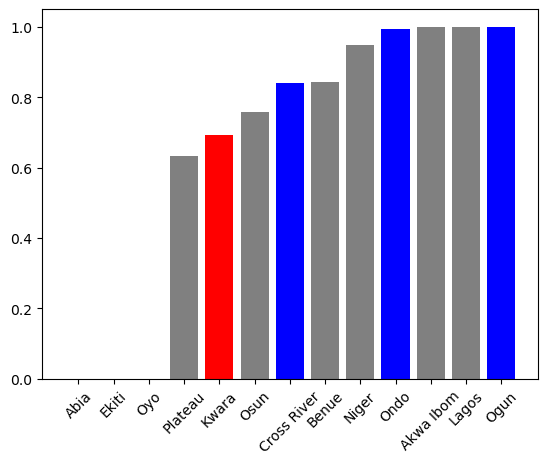

Cross-Class Accuracy scores are:


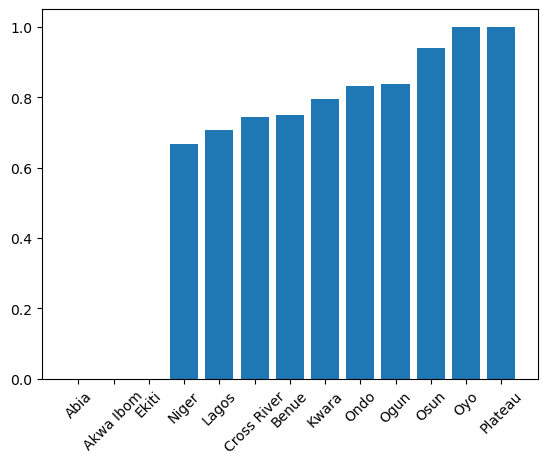

-------------------------------
Running the Analysis for ETH
-------------------------------
Best model for ETH is: Model('Light Gradient Boosted Trees Classifier with Early Stopping')
AUC for this model is: 0.64325
LogLoss for this model is: 0.44766
Fairness scores are:


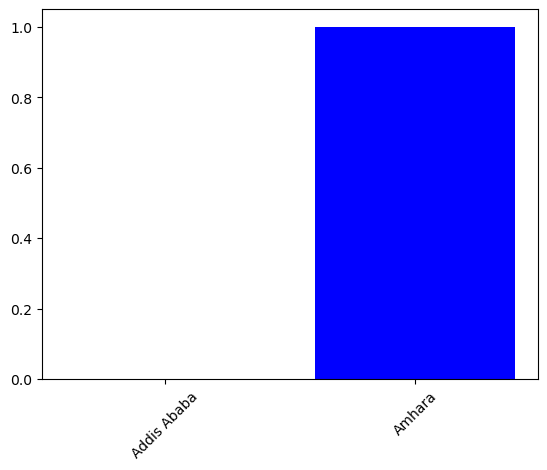

Cross-Class Accuracy scores are:


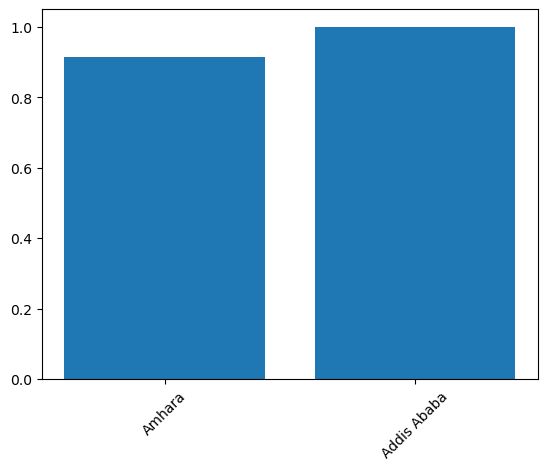

-------------------------------
Running the Analysis for GHA
-------------------------------
Best model for GHA is: Model('Keras Slim Residual Neural Network Classifier using Training Schedule (1 Layer: 64 Units)')
AUC for this model is: 0.37708
LogLoss for this model is: 0.08318
*** DataRobot was not able to run B&F on this model due to lack of data ***
-------------------------------
Running the Analysis for TZA
-------------------------------
Best model for TZA is: Model('Light Gradient Boosted Trees Classifier with Early Stopping')
AUC for this model is: 0.91034
LogLoss for this model is: 0.37856
Fairness scores are:


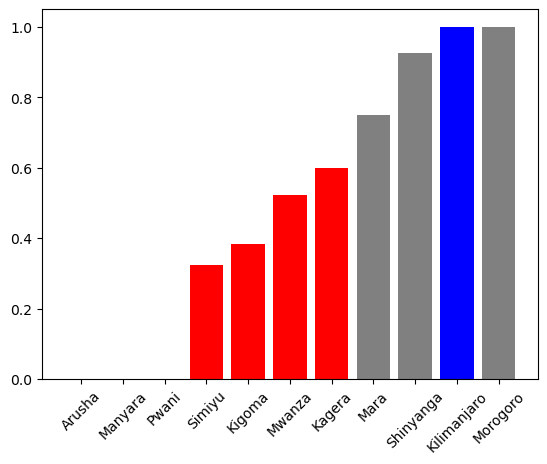

Cross-Class Accuracy scores are:


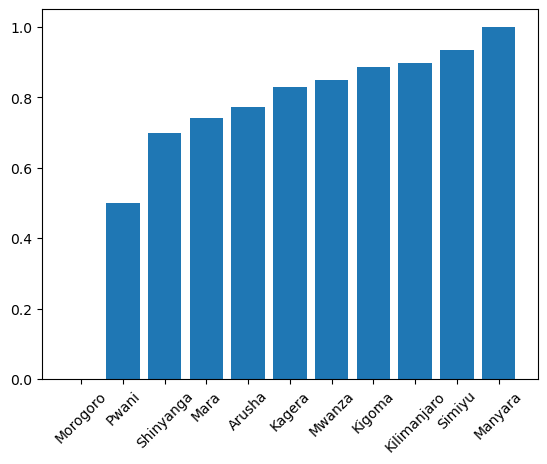

-------------------------------
Running the Analysis for MWI
-------------------------------
Best model for MWI is: Model('Light Gradient Boosted Trees Classifier with Early Stopping')
AUC for this model is: 0.89889
LogLoss for this model is: 0.34292
Fairness scores are:


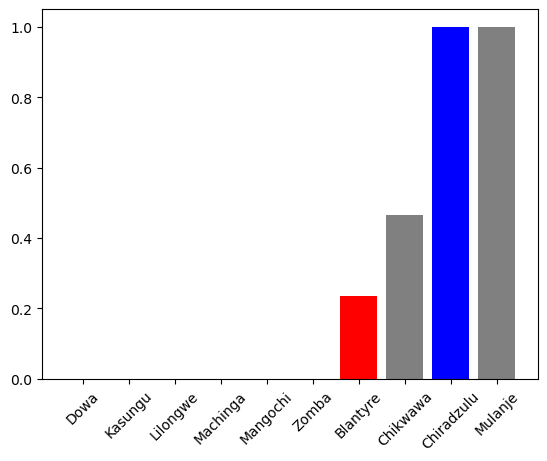

Cross-Class Accuracy scores are:


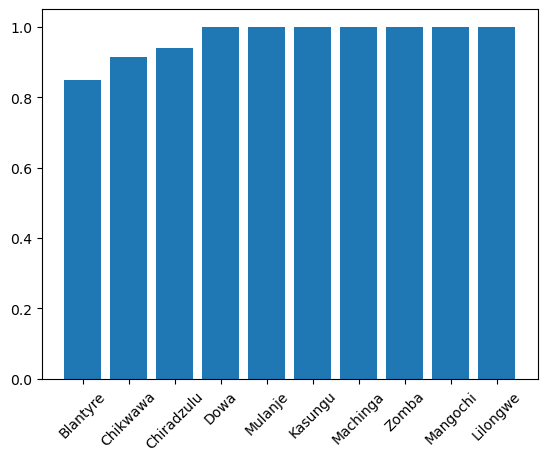

-------------------------------
Running the Analysis for BGD
-------------------------------
Best model for BGD is: Model('Generalized Additive2 Model')
AUC for this model is: 0.99998
LogLoss for this model is: 0.00986
Fairness scores are:


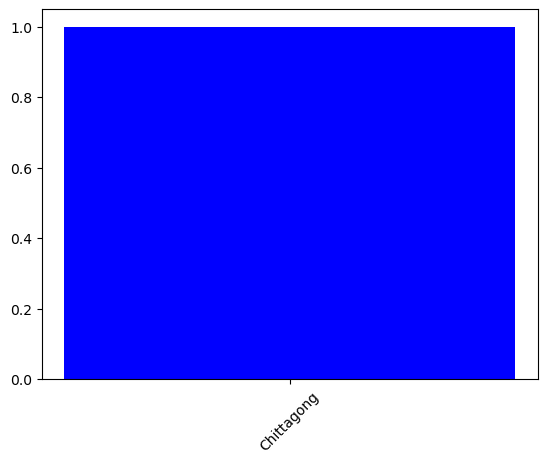

Cross-Class Accuracy scores are:


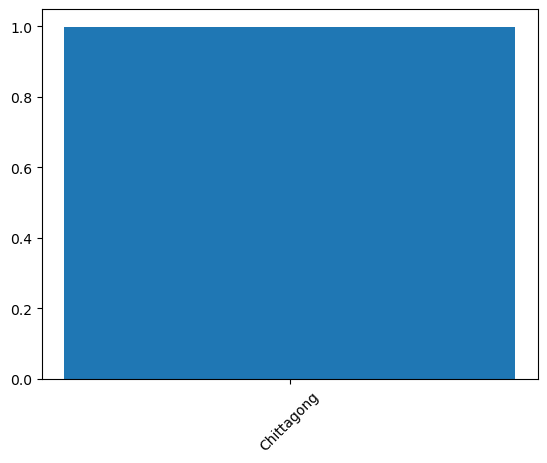

-------------------------------
Running the Analysis for IND
-------------------------------
Best model for IND is: Model('Light Gradient Boosting on ElasticNet Predictions ')
AUC for this model is: 0.9286
LogLoss for this model is: 0.1164
Fairness scores are:


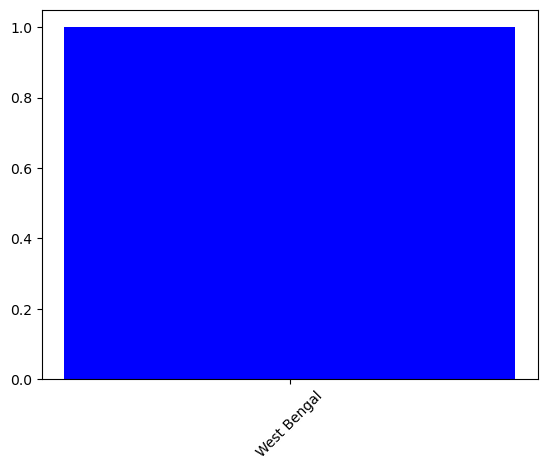

Cross-Class Accuracy scores are:


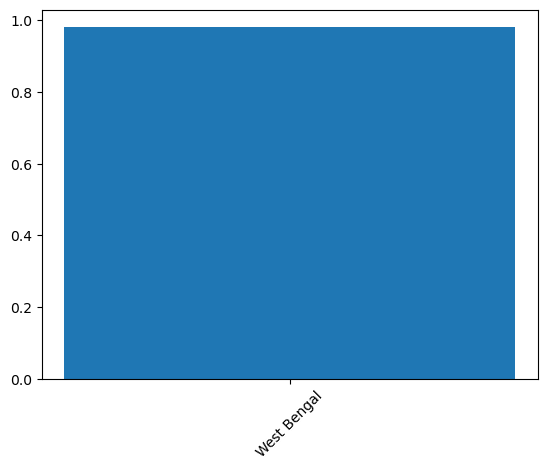

-------------------------------
Running the Analysis for LBR
-------------------------------
Best model for LBR is: Model('Generalized Additive2 Model')
AUC for this model is: 0.93324
LogLoss for this model is: 0.15994
*** DataRobot was not able to run B&F on this model due to lack of data ***
-------------------------------
Running the Analysis for ZWE
-------------------------------
Best model for ZWE is: Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping')
AUC for this model is: 0.67571
LogLoss for this model is: 0.48829
Fairness scores are:


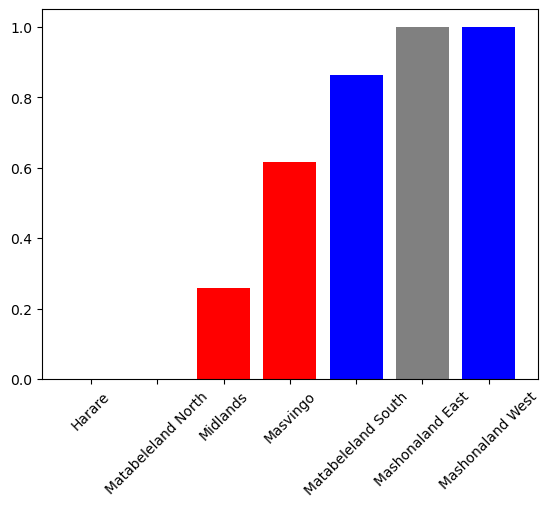

Cross-Class Accuracy scores are:


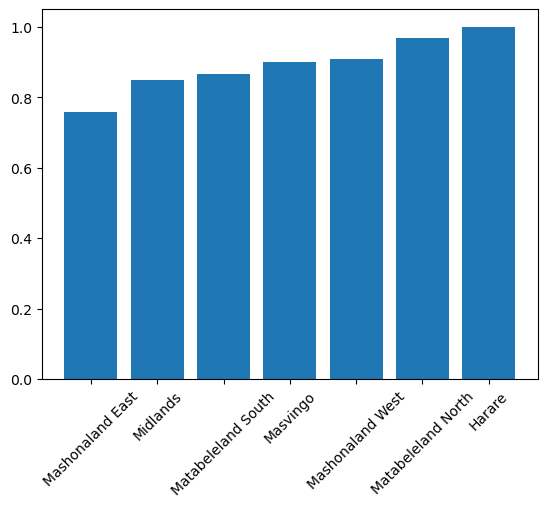

-------------------------------
Running the Analysis for KEN
-------------------------------
Best model for KEN is: Model('Light Gradient Boosting on ElasticNet Predictions ')
AUC for this model is: 0.73897
LogLoss for this model is: 0.1464
*** DataRobot was not able to run B&F on this model due to lack of data ***
-------------------------------
Running the Analysis for SSD
-------------------------------
Best model for SSD is: Model('Keras Slim Residual Neural Network Classifier using Training Schedule (1 Layer: 64 Units)')
AUC for this model is: 0.76515
LogLoss for this model is: 0.57075
Fairness scores are:


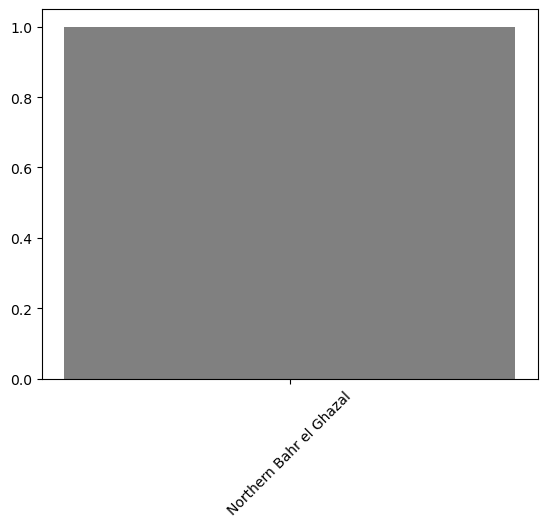

Cross-Class Accuracy scores are:


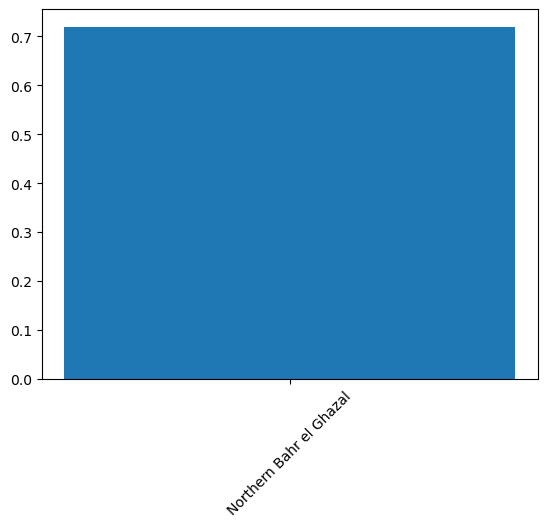

-------------------------------
Running the Analysis for UGA
-------------------------------
Best model for UGA is: Model('Light Gradient Boosted Trees Classifier with Early Stopping')
AUC for this model is: 0.90596
LogLoss for this model is: 0.21167
Fairness scores are:


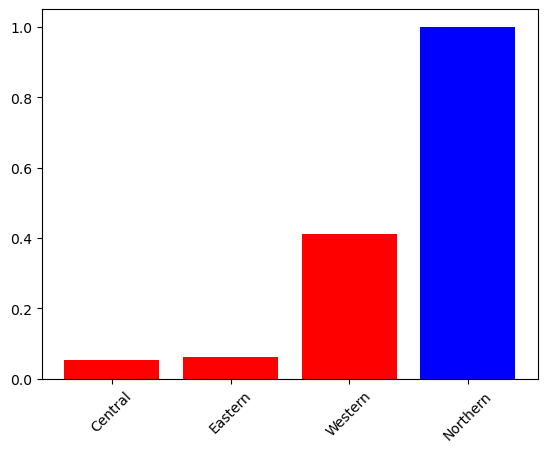

Cross-Class Accuracy scores are:


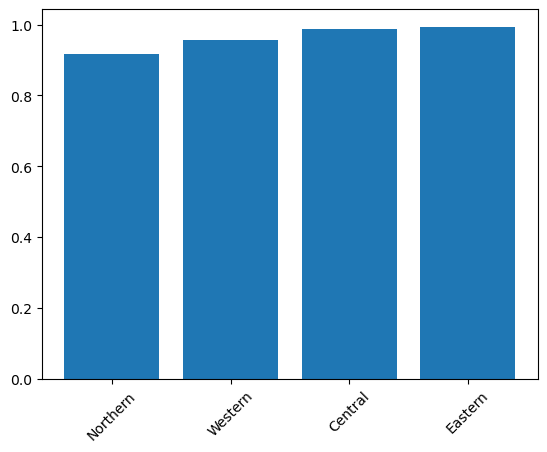

-------------------------------
Running the Analysis for HTI
-------------------------------
Best model for HTI is: Model('Generalized Additive2 Model')
AUC for this model is: 0.84248
LogLoss for this model is: 0.25495
*** DataRobot was not able to run B&F on this model due to lack of data ***
-------------------------------
Running the Analysis for GTM
-------------------------------
Best model for GTM is: Model('Light Gradient Boosted Trees Classifier with Early Stopping')
AUC for this model is: 0.71786
LogLoss for this model is: 0.37039
*** DataRobot was not able to run B&F on this model due to lack of data ***


In [97]:
# assess bias and fairness for each country
bias_dict = {
    'protected_features':'clean_adm1',
    'preferable_target_value':'No',
    'metric':'proportionalParity',
    'fairness_threshold':0.8  
}
from matplotlib import pyplot as plt

def color_code(row,bias_dict):
    if row['isStatisticallySignificant'] == False:
        return 'gray'
    else:
        if row['value'] >= bias_dict['fairness_threshold']:
            return 'blue'
        else:
            return 'red'

summary={}
for name,proj in project_dict.items():
    #for each project
    print('-------------------------------')
    print('Running the Analysis for {}'.format(name))
    print('-------------------------------')
    
    project= dr.Project.get(project_id=proj.id)

    valid_models = [m for m in project.get_models() if m.metrics[project.metric]['crossValidation']]
    best_model = sorted(valid_models, key=lambda m: m.metrics[project.metric]['crossValidation'])[0]
    print('Best model for {} is: {}'.format(name,best_model))

    val_scores = ({'model_type': best_model.model_type,
                           'blueprint info': best_model.blueprint,
                           'model_id': best_model.id,
                           'sample_pct': best_model.sample_pct,
                           'featurelist': best_model.featurelist_name,
                           'AUC': best_model.metrics['AUC']['validation'],
                           'LogLoss':best_model.metrics['LogLoss']['validation'], #update for Backtesting
                           'cross_val_rmse': best_model.metrics['RMSE']['crossValidation']})
     #store it in a dict
    summary[name]=val_scores

    print('AUC for this model is: {}'.format(best_model.metrics['AUC']['validation']))
    print('LogLoss for this model is: {}'.format(best_model.metrics['LogLoss']['validation']))
    
    
    fairness_scores = best_model.request_fairness_insights(fairness_metrics_set=bias_dict['metric'])
    fairness_scores_dict = best_model.get_fairness_insights()

    b = fairness_scores_dict['data']
    if b == []:
        print('*** DataRobot was not able to run B&F on this model due to lack of data ***')
        continue
    c = b[0]
    fairness_scores_df = pd.DataFrame(c['perClassFairness'])

    print("Fairness scores are:")
    
    fairness_scores_df['color'] = fairness_scores_df.apply(lambda x: color_code(x,bias_dict), axis=1)
 
    df_sorted = fairness_scores_df.sort_values('value')
    plt.bar('className', 'value', data=df_sorted, color='color')
    plt.xticks(rotation = 45) 

    plt.show()
    
    # Get Cross-Class Accuracy scores
    cross_class_accuracy = best_model.request_cross_class_accuracy_scores()
    cross_class_accuracy_dict = best_model.get_cross_class_accuracy_scores()

    b = cross_class_accuracy_dict['data']
    c = b[0]
    d = c['perClassAccuracyScores']

    lll = []
    for i in d:
        s = i['className']
        ss = i['metrics']
        sss = ss[1]['value']
        lll.append([s,sss])

    cross_class_accuracy_df = pd.DataFrame(lll,columns=['className','F1 Metric Value'])

    print("Cross-Class Accuracy scores are:")
#    print(cross_class_accuracy_df)

    df_sorted = cross_class_accuracy_df.sort_values('F1 Metric Value')
    plt.bar('className', 'F1 Metric Value', data=df_sorted)
    plt.xticks(rotation = 45) 

    plt.show()


In [ ]:
# deploy model 

In [ ]:
# set up ML Ops

In [ ]:
# Set up Job Definitions

Scratch code from other projects

In [ ]:
# assess performance 
# assess performance
acc_df = pd.DataFrame(columns=['target', 'odds usage', 'partitioning', 'pid', 'logloss', 'auc'])
for (target, odds, partition, pid) in pids:
    
    # get project
    project = dr.Project.get(pid)

    # get best cross validated model
    valid_models = [m for m in project.get_models() if m.metrics[project.metric]['crossValidation']]
    best_model = sorted(valid_models, key=lambda m: m.metrics[project.metric]['crossValidation'])[0]
    
    # record performance
    acc_df.loc[acc_df.shape[0]] = [target, odds, partition, pid, best_model.metrics['LogLoss']['crossValidation'], best_model.metrics['AUC']['crossValidation']]
    
display(acc_df.sort_values(['target', 'odds usage', 'partitioning'], ascending=[False, True, True]))

In [ ]:
# Feature impact across top(?) countries? 
ll_fi = pd.DataFrame()
for (target, odds, partition, pid) in pids:
    
    # get project
    project = dr.Project.get(pid)
    
    # get best cross validated model
    valid_models = [m for m in project.get_models() if m.metrics[project.metric]['crossValidation'] and m.sample_pct < 100]
    best_model = sorted(valid_models, key=lambda m: m.metrics[project.metric]['crossValidation'])[0]
    
    # get feature impact
    fi = pd.DataFrame(best_model.get_or_request_feature_impact())

    # tag with metadata
    fi.insert(0, 'target', target)
    fi.insert(1, 'odds', odds)
    fi.insert(2, 'partition', partition)
    fi.insert(3, 'pid', pid)
    
    # concat with other projects
    all_fi = pd.concat([all_fi, fi], ignore_index=True, sort=False)
    
display(all_fi)

In [ ]:
all_fi.groupby('featureName')['impactNormalized'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')

In [ ]:
top_fi = all_fi.groupby('featureName')['impactNormalized'].mean().sort_values(ascending=False).head(20).index

In [ ]:
all_fi.loc[all_fi['featureName'].isin(top_fi)].boxplot(column='impactNormalized',by='featureName', vert=False, figsize=(10,5))